In [1]:
import csv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import pylab as pl

In [2]:
cities=pd.read_csv('/Users/bk/Python Class/cities.csv',index_col="id")
station_lines=pd.read_csv('/Users/bk/Python Class/station_lines.csv',index_col="id")
lines=pd.read_csv('/Users/bk/Python Class/lines.csv',index_col="id")
systems_transport=pd.read_csv('/Users/bk/Python Class/systems.csv',index_col="id")
stations=pd.read_csv('/Users/bk/Python Class/stations.csv',index_col="id")
track_lines=pd.read_csv('/Users/bk/Python Class/track_lines.csv',index_col="id")
tracks=pd.read_csv('/Users/bk/Python Class/tracks.csv',index_col="id")

In [3]:
#lets explore our data
print("cities size:",len(cities))
print("stations size:",len(stations))
print("tracks size:",len(tracks))
print("lines size:",len(lines))
print("track_lines size:",len(track_lines))
print("systems_transport",len(systems_transport))
print("station_lines",len(station_lines))

cities size: 334
stations size: 15794
tracks size: 9271
lines size: 1343
track_lines size: 9757
systems_transport 488
station_lines 16242


In [30]:
#lets organize our data
def parse_linestring(geometry):
    """
    :param geometry: a string in the format "LINESTRING(x1 y1, x2 y2, ..., xn yn)"
    return numpy array of shape (n, 2) with coordinates
    """
    start = geometry.find('(')
    end = geometry.find(')')
    substring = geometry[start+1:end]
    return np.array(
        [[float(f) for f in pair.split(' ')] for pair in substring.split(',')])

In [31]:
#lets check if the function works
parse_linestring(tracks['geometry'][2563])

array([[16.4151057, 48.1907238],
       [16.4156455, 48.190389 ],
       [16.4170845, 48.1895171]])

In [32]:
def parse_point(coords):
    """
    :param coords: a string in the form "POINT(x, y)"
    :return: [x, y] as floats
    """
    start, end = coords.find('('), coords.find(')')
    return [float(p) for p in coords[start+1:end].split(' ')]

In [7]:
#check it the function works for city of Prague
cities['name'][99], parse_point(cities['coords'][99])

('Prague', [14.43333333, 50.08333333])

# 1. Maps of sleceted cities on a grid eg (lines in different color 4X3)

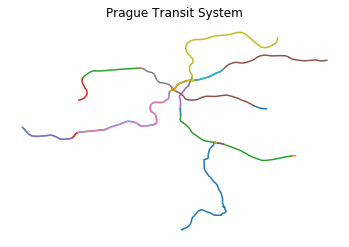

In [8]:
#lets plot the transit system of Prague
code = 99
name = cities['name'][code]
for line in tracks[tracks['city_id'] == code]['geometry']:
    xy = parse_linestring(line)
    plt.plot(xy[:,0], xy[:, 1])
plt.title(f'{name} Transit System')
plt.axis(False);

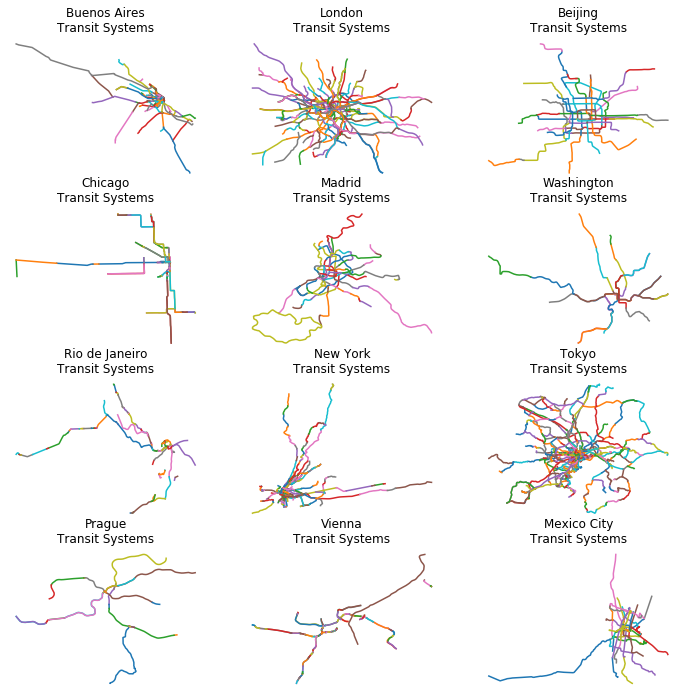

In [9]:
# now we can reply to the question number 1
codes = 1,69,15,147,71,252, 102, 206, 114, 99, 118, 78

fig, axx=plt.subplots(4,3, figsize=(12,12))

for code, ax in zip(codes,axx.flatten()):
    name = cities['name'][code]
    for line in tracks[tracks['city_id'] == code]['geometry']:
        xy = parse_linestring(line)
        ax.plot(xy[:,0], xy[:, 1])
    ax.set_title(f'{name}\nTransit Systems')
    ax.axis(False);
plt.savefig('map.png',dpi=300)

# 2. A bar plot of total lengths of each city's transit lines. (+ Top 10 by lenght)


In [10]:
#prep the data
def parse_point(coords):
    """
    :param coords: a string in the format "POINT(x1 y1, x2 y2, ..., xn yn)"
    return numpy array of shape (n, 2) with coordinates
    """
    start = coords.find('(')
    end = coords.find(')')
    substring = coords[start+1:end]
    return np.array(
        [[float(f) for f in pair.split(' ')] for pair in substring.split(',')])

In [11]:
#lets see if it works 
parse_point(cities['coords'][5])

array([[-2.15, 57.15]])

In [12]:
import math
def route_length(line): 
    """
    distance of a line defined by a sequence of n waypoints 
    :param line: is a numpy array of shape (n, 2) 
    :return: length of the line in km
    """
    earth_radius = 6371
    assert len(cities) >=2, 'at least two cities are requied'
    
    point1 = line[0]
    total = 0.0
    for point2 in line[1:]:
        x1, y1 = math.radians(point1[0]), math.radians(point1[1])
        x2, y2 = math.radians(point2[0]), math.radians(point2[1])
        total += math.asin(math.sqrt(
            math.sin((x2 - x1) / 2)**2 + 
            math.cos(y1) * math.cos(y2) * math.sin((y2 - y1) / 2)**2))
        point1 = point2
    return total * 2 * earth_radius

In [13]:
codes = 110,69,15,147,71,252
for code in codes:
    name = cities['name'][code]
    length = 0
    for line in tracks[tracks['city_id'] == code]['geometry']:
        xy = parse_linestring(line)
        length += route_length(xy)
    print(f"The length of the {name} transit system is {length:.1f} km")

The length of the Stockholm transit system is 189.9 km
The length of the London transit system is 2394.6 km
The length of the Beijing transit system is 727.2 km
The length of the Chicago transit system is 200.2 km
The length of the Madrid transit system is 340.8 km
The length of the Washington transit system is 332.6 km


In [14]:
systems = {}

for code in cities.index:
    length = 0
    name = cities['name'][code]
    for line in tracks[tracks['city_id'] == code]['geometry']:
        try:
            xy = parse_linestring(line)
        except ValueError:
            continue
        length += route_length(xy)
    if length:
        print(f"{code} {name} {length:.1f} km")
        systems[name] = length

147 Chicago 200.2 km
280 Clermont-Ferrand 34.3 km
268 San Sebastián 81.4 km
29 Budapest 77.5 km
23 Bordeaux 135.9 km
19 Berlin 1.3 km
283 Besancon 35.1 km
45 Edinburgh 6.7 km
48 Glasgow 618.6 km
294 Le Mans 40.1 km
56 Hong Kong 35.4 km
63 Kuala Lumpur 86.4 km
300 Montpellier 108.1 km
70 Lyons 148.6 km
67 Lisbon 118.0 km
72 Manchester 8.4 km
82 Munich 183.2 km
74 Marseilles 79.1 km
79 Milan 624.5 km
310 Rouen 31.8 km
305 Dijon 41.1 km
317 Mulhouse 58.8 km
324 Nice 16.5 km
314 Reims 12.6 km
318 Nancy 20.1 km
308 Orleans 46.1 km
331 Le Havre 32.4 km
327 Lille 99.2 km
91 Osaka 2633.9 km
87 Naples 24.1 km
95 Paris 706.5 km
325 Toulouse 46.3 km
89 Newcastle-on-Tyne 195.6 km
328 Strasbourg 53.8 km
104 Salvador 27.2 km
99 Prague 115.6 km
307 Tours 30.0 km
103 Rome 156.1 km
275 Angers 37.2 km
106 São Paulo 842.1 km
286 Grenoble 91.0 km
111 Sydney 370.9 km
77 Melbourne 65.9 km
102 Rio de Janeiro 167.8 km
64 La Paz 34.2 km
114 Tokyo 5204.0 km
293 Brest 33.2 km
116 Venice 55.2 km
124 Valparaíso 78

In [15]:
# sort by values 
systems = {k: systems[k] for k in sorted(systems, key=systems.get)}

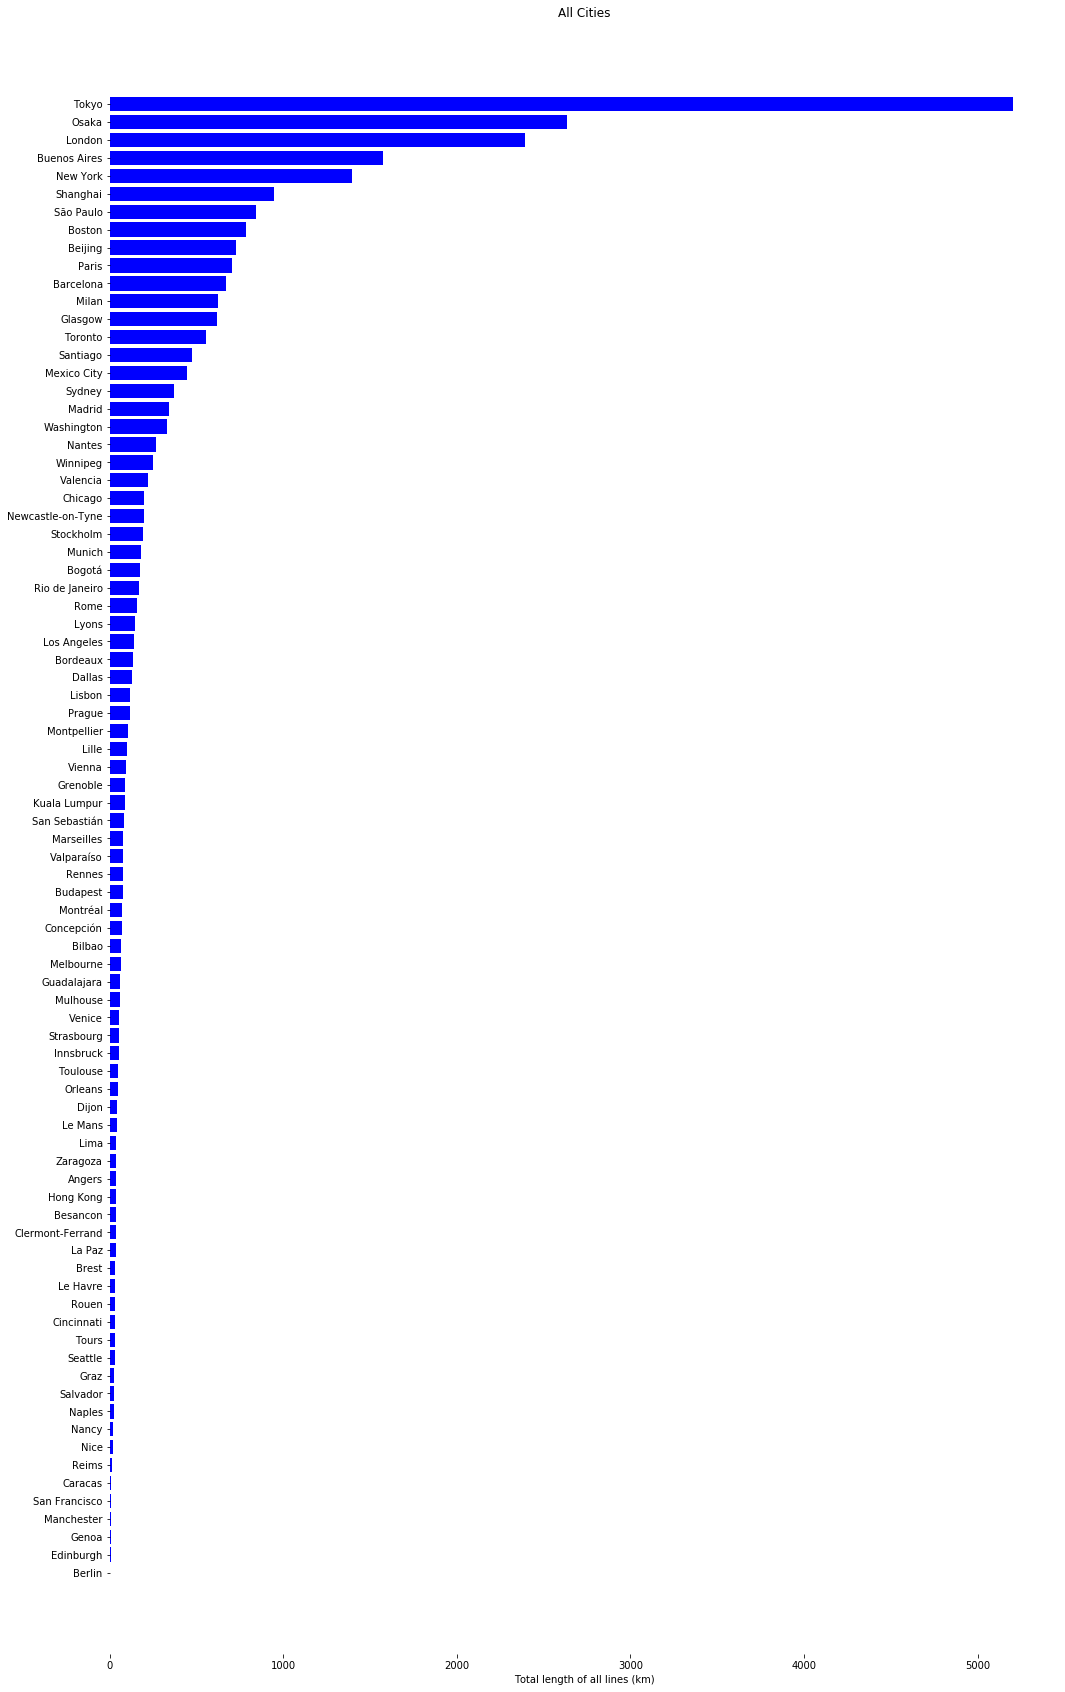

In [16]:
# lets bar plot all cities by length
fig, ax = plt.subplots(1, 1, figsize=(17,30))
n =60
lengths = list(systems.values())[-n:]
ax.barh(np.r_[:len(systems)], list(systems.values()), color = 'blue')
ax.set_yticks(np.r_[:len(systems)])
ax.set_yticklabels(list(systems))
ax.set_title('All Cities')
ax.set(frame_on=False)
ax.set_xlabel('Total length of all lines (km)');

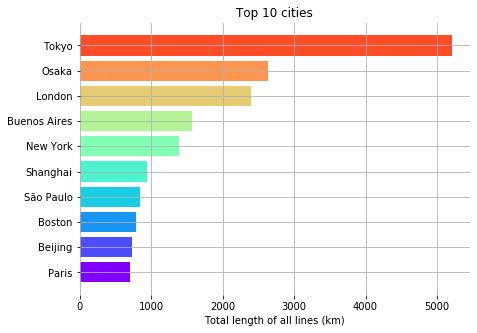

In [17]:
# TOP 10 cities
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
n = 10
colors = [plt.cm.rainbow(i/n) for i in range(n)]
ax.barh(np.r_[:n], list(systems.values())[-n:], color=colors)
ax.set_yticks(np.r_[:n])
ax.set_yticklabels(list(systems)[-n:])
ax.set_title(f'Top {n} cities')
ax.set(frame_on=False)
ax.grid(True)
ax.set_xlabel('Total length of all lines (km)');

# 3. Total length of the transit lines across all cities across time (km), or change per decade.

In [18]:
#Sum of track length by years 
#open_tracks=tracks[tracks['opening']!=0]
open_tracks = tracks[(tracks['opening'] > 1830) & (tracks['opening'] < 2020) ]

In [19]:
for rec in open_tracks.to_records():
    print("{opening},{length} (m)".format(opening=rec['opening'], length=rec['length']))

1926.0,3534 (m)
1921.0,4966 (m)
1960.0,115 (m)
2002.0,618 (m)
2000.0,3232 (m)
1889.0,15949 (m)
1914.0,1085 (m)
1913.0,12887 (m)
1916.0,6258 (m)
1978.0,2640 (m)
1972.0,3781 (m)
1994.0,100 (m)
1993.0,753 (m)
1924.0,1099 (m)
1915.0,1502 (m)
1925.0,16060 (m)
1895.0,9451 (m)
2007.0,73 (m)
1954.0,1487 (m)
1905.0,818 (m)
1994.0,220 (m)
2013.0,37 (m)
1997.0,39 (m)
1994.0,20 (m)
2007.0,73 (m)
1926.0,3515 (m)
1994.0,2492 (m)
1994.0,148 (m)
2007.0,84 (m)
1994.0,91 (m)
1994.0,91 (m)
2007.0,27 (m)
2017.0,1122 (m)
1972.0,11992 (m)
1903.0,446 (m)
2007.0,26 (m)
1903.0,1512 (m)
1904.0,816 (m)
1913.0,345 (m)
1903.0,1706 (m)
2013.0,940 (m)
1969.0,1634 (m)
1994.0,474 (m)
1980.0,6536 (m)
1992.0,250 (m)
2002.0,13 (m)
2018.0,632 (m)
2014.0,3687 (m)
2002.0,1332 (m)
1917.0,5463 (m)
1894.0,7634 (m)
1944.0,8045 (m)
1991.0,1165 (m)
2005.0,37906 (m)
1922.0,2511 (m)
1930.0,3444 (m)
1983.0,1222 (m)
1926.0,5669 (m)
1949.0,1304 (m)
1963.0,574 (m)
1968.0,7164 (m)
1928.0,4652 (m)
1994.0,115 (m)
2001.0,14766 (m)
1961.0,1

In [20]:
for rec in open_tracks.to_records():
    year = int(rec['opening'])
    length = rec['length']
    print(f"{year}: {length} (m)")

1926: 3534 (m)
1921: 4966 (m)
1960: 115 (m)
2002: 618 (m)
2000: 3232 (m)
1889: 15949 (m)
1914: 1085 (m)
1913: 12887 (m)
1916: 6258 (m)
1978: 2640 (m)
1972: 3781 (m)
1994: 100 (m)
1993: 753 (m)
1924: 1099 (m)
1915: 1502 (m)
1925: 16060 (m)
1895: 9451 (m)
2007: 73 (m)
1954: 1487 (m)
1905: 818 (m)
1994: 220 (m)
2013: 37 (m)
1997: 39 (m)
1994: 20 (m)
2007: 73 (m)
1926: 3515 (m)
1994: 2492 (m)
1994: 148 (m)
2007: 84 (m)
1994: 91 (m)
1994: 91 (m)
2007: 27 (m)
2017: 1122 (m)
1972: 11992 (m)
1903: 446 (m)
2007: 26 (m)
1903: 1512 (m)
1904: 816 (m)
1913: 345 (m)
1903: 1706 (m)
2013: 940 (m)
1969: 1634 (m)
1994: 474 (m)
1980: 6536 (m)
1992: 250 (m)
2002: 13 (m)
2018: 632 (m)
2014: 3687 (m)
2002: 1332 (m)
1917: 5463 (m)
1894: 7634 (m)
1944: 8045 (m)
1991: 1165 (m)
2005: 37906 (m)
1922: 2511 (m)
1930: 3444 (m)
1983: 1222 (m)
1926: 5669 (m)
1949: 1304 (m)
1963: 574 (m)
1968: 7164 (m)
1928: 4652 (m)
1994: 115 (m)
2001: 14766 (m)
1961: 1150 (m)
1994: 1352 (m)
1927: 983 (m)
1928: 1175 (m)
1950: 4572 (m

In [21]:
open_lines = {}
for rec in open_tracks.to_records():
    try:
        year = int(rec['opening'])
    except ValueError:
        continue
    length = rec['length']
    if year not in open_lines:
        open_lines[year] = 0
    open_lines[year] += length

In [22]:
r = np.array(list(open_lines.items()))

Text(0.5, 1.0, 'New tracks open across the world 1825-2025')

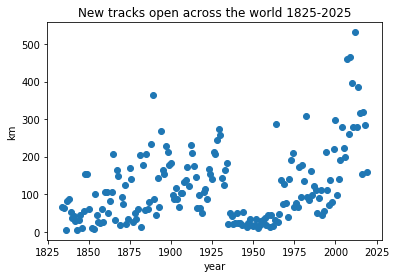

In [23]:
plt.scatter(r[:, 0], r[:, 1]/1000)
plt.xlabel('year')
plt.ylabel('km')
plt.title('New tracks open across the world 1825-2025')

# 4. World map of cities with an indication of the size of the transit city as a dot size or color

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

In [25]:
# re-use the systems dict
systems

{'Berlin': 1.3293363861346605,
 'Edinburgh': 6.735829319259574,
 'Genoa': 7.7265681677903775,
 'Manchester': 8.413497978177798,
 'San Francisco': 9.315227637030159,
 'Caracas': 9.941884024849681,
 'Reims': 12.590044696919392,
 'Nice': 16.50396368384164,
 'Nancy': 20.10286082451035,
 'Naples': 24.10564125065654,
 'Salvador': 27.166441044528746,
 'Graz': 27.362098771841627,
 'Seattle': 29.9612634507052,
 'Tours': 30.01113370124601,
 'Cincinnati': 30.080927162949074,
 'Rouen': 31.753247545440058,
 'Le Havre': 32.36283579579625,
 'Brest': 33.19226910539576,
 'La Paz': 34.17525343690332,
 'Clermont-Ferrand': 34.26065314761194,
 'Besancon': 35.09832533332456,
 'Hong Kong': 35.36648703523101,
 'Angers': 37.248843797963616,
 'Zaragoza': 38.609896675440446,
 'Lima': 38.853388834485,
 'Le Mans': 40.136975854913956,
 'Dijon': 41.13902857341335,
 'Orleans': 46.07548157396888,
 'Toulouse': 46.324726409864525,
 'Innsbruck': 53.58863881277457,
 'Strasbourg': 53.75664769352235,
 'Venice': 55.231288234

In [26]:
cities

,name,coords,start_year,url_name,country,country_state
id,,,,,,
5,Aberdeen,POINT(-2.15 57.15),2017.0,aberdeen,Scotland,NaN
6,Adelaide,POINT(138.6 -34.91666667),2017.0,adelaide,Australia,NaN
7,Algiers,POINT(3 36.83333333),2017.0,algiers,Algeria,NaN
9,Ankara,POINT(32.91666667 39.91666667),2017.0,ankara,Turkey,NaN
16,Belém,POINT(-48.48333333 -1.466666667),2017.0,belem,Brazil,NaN
10,Asunción,POINT(-57.66666667 -25.25),2017.0,asuncion,Paraguay,NaN
11,Athens,POINT(23.71666667 37.96666667),2017.0,athens,Greece,NaN
12,Auckland,POINT(174.75 -36.86666667),2017.0,auckland,New Zealand,NaN
13,Bangkok,POINT(100.5 13.75),2017.0,bangkok,Thailand,NaN


In [33]:
city_points = np.array([parse_point(p) + [systems.get(name, 0)] for p, name in zip(cities['coords'], cities['name'])])

In [34]:
city_points

array([[-2.15000000e+00,  5.71500000e+01,  0.00000000e+00],
       [ 1.38600000e+02, -3.49166667e+01,  0.00000000e+00],
       [ 3.00000000e+00,  3.68333333e+01,  0.00000000e+00],
       ...,
       [-1.68083300e+00,  4.81141670e+01,  7.78066853e+01],
       [ 1.16416667e+02,  3.99166667e+01,  7.27184685e+02],
       [-8.33333333e-02,  5.15333333e+01,  2.39458636e+03]])

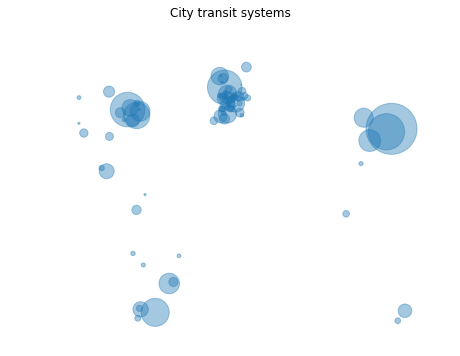

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(city_points[:, 0], city_points[:, 1], s=city_points[:,2]/2, alpha=0.4)
ax.axis('off')
ax.set_title('City transit systems')
fig.savefig('city-world.png')

# 5. What are top 10 countries by number of stations?


In [36]:
stations

,name,geometry,buildstart,opening,closure,city_id
id,,,,,,
7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
7696,Keisei Makuhari,POINT(140.056077093286 35.6605591225961),1921.0,1921.0,999999.0,114
7719,Malpassé,POINT(5.4165033 43.3209501),1973.0,1977.0,999999.0,74
7697,Kemigawa,POINT(140.066304589107 35.6526280375642),1921.0,1921.0,999999.0,114
1,Caseros,POINT(-58.3989075634122 -34.6358418393779),2001.0,2007.0,NaN,1


In [37]:
cities

,name,coords,start_year,url_name,country,country_state
id,,,,,,
5,Aberdeen,POINT(-2.15 57.15),2017.0,aberdeen,Scotland,NaN
6,Adelaide,POINT(138.6 -34.91666667),2017.0,adelaide,Australia,NaN
7,Algiers,POINT(3 36.83333333),2017.0,algiers,Algeria,NaN
9,Ankara,POINT(32.91666667 39.91666667),2017.0,ankara,Turkey,NaN
16,Belém,POINT(-48.48333333 -1.466666667),2017.0,belem,Brazil,NaN
10,Asunción,POINT(-57.66666667 -25.25),2017.0,asuncion,Paraguay,NaN
11,Athens,POINT(23.71666667 37.96666667),2017.0,athens,Greece,NaN
12,Auckland,POINT(174.75 -36.86666667),2017.0,auckland,New Zealand,NaN
13,Bangkok,POINT(100.5 13.75),2017.0,bangkok,Thailand,NaN


In [39]:
#lets join cities and stations
country_stations = stations.join(cities['country'], on='city_id')
country_stations

,name,geometry,buildstart,opening,closure,city_id,country
id,,,,,,,
7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,Japan
6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29,Hungary
7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74,France
7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114,Japan
7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74,France
7696,Keisei Makuhari,POINT(140.056077093286 35.6605591225961),1921.0,1921.0,999999.0,114,Japan
7719,Malpassé,POINT(5.4165033 43.3209501),1973.0,1977.0,999999.0,74,France
7697,Kemigawa,POINT(140.066304589107 35.6526280375642),1921.0,1921.0,999999.0,114,Japan
1,Caseros,POINT(-58.3989075634122 -34.6358418393779),2001.0,2007.0,NaN,1,Argentina


In [40]:
country_stations.groupby(['country']).count()['city_id']

country
Argentina          685
Australia          113
Austria            306
Belgium              4
Bolivia             42
Brazil             381
Canada             218
Chile              462
China              705
Colombia            37
Czech Republic      46
England            970
France            2763
Germany            385
Hungary             62
Italy              422
Japan             4613
Malaysia            37
Mexico             467
México              20
Netherlands          2
Peru                31
Portugal            56
Scotland           157
Spain              775
Sweden              25
United States     2001
Venezuela            9
Name: city_id, dtype: int64

In [41]:
stations.name.count()

14248

In [43]:
count_stations=country_stations.groupby(['country']).count()['city_id'].sort_values()

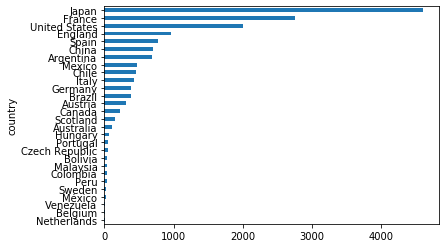

In [44]:
count_stations.plot.barh()

# 6. Sum of track length by years

In [46]:
year_built = {}

for code in tracks.index:
    length = 0 
    year = tracks['opening'][code]
    for line in tracks[tracks['opening']==code]['geometry']:
        try:
            xy = parse_linestring(line)
        except ValueError:
            continue
        length += route_length(xy)
    if length:
        year_built[year] = length

In [47]:
del year_built[0.0]

In [48]:
year_built = {k: year_built[k] for k in sorted(year_built.keys())}

In [49]:
long = 0
distance = {}
for i in year_built:
    long += year_built[i]
    distance[i] = long

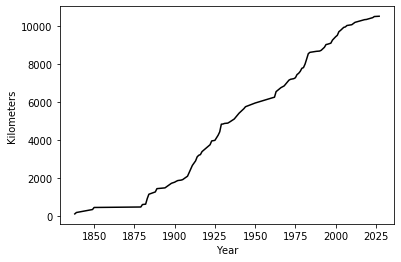

In [51]:
plt.plot(*zip(*sorted(distance.items())), color='black')
plt.xlabel('Year')
plt.ylabel('Kilometers')
plt.show();

# 7. Tracks build per year

In [52]:
opening_year = year_built

In [53]:
opening_year = {k: opening_year[k] for k in sorted(opening_year.keys(), reverse = True)}


Text(0.5, 0, 'Total length of tracks (km)')

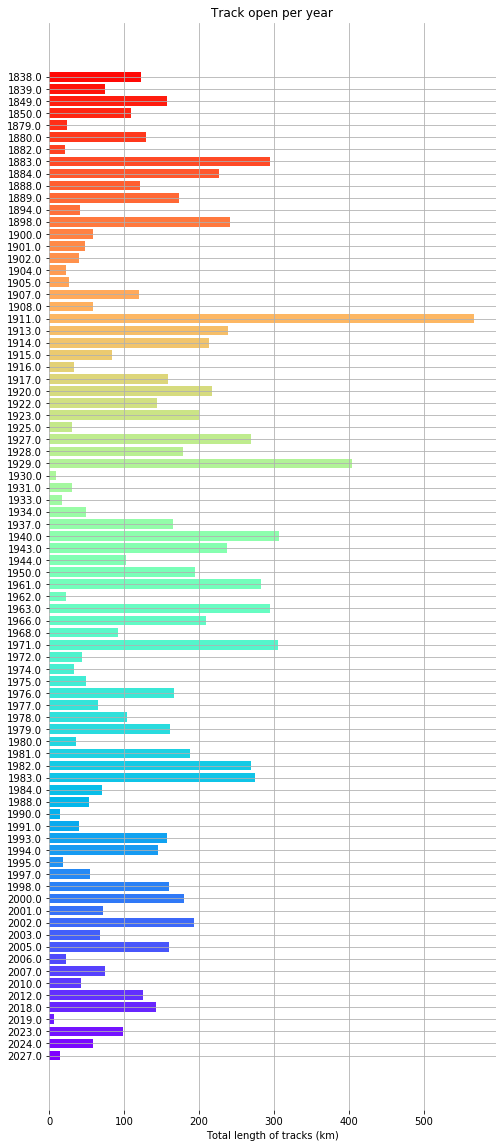

In [79]:
fig, ax = plt.subplots(1,1, figsize=(8,20))
n = len(opening_year)
colors = [plt.cm.rainbow(i/n) for i in range(n)]
ax.barh(np.r_[:n], list(opening_year.values())[-n:], color= colors)
ax.set_yticks(np.r_[:n])
ax.set_yticklabels(list(opening_year)[-n:])
ax.set_title(f'Track open per year')
ax.set(frame_on=False)
ax.grid(True)
ax.set_xlabel('Total length of tracks (km)')

# 8. Location of all the Stations in Dataset

In [55]:
station_points = np.array([parse_point(p) for p in stations['geometry']])

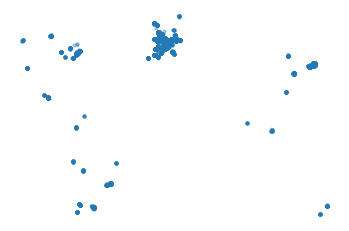

In [56]:
plt.scatter(station_points[:,0], station_points[:,1], s=10, alpha=0.2)
plt.axis(False);

# 9. Accumulation of track length over the years

In [59]:
stockholm_years = pd.DataFrame(tracks)
indexnames = stockholm_years[stockholm_years['city_id'] != 110].index
stockholm_years.drop(indexnames , inplace=True)

In [60]:
st_years = []
st_totals = []
year = 1834
kms = 0
while year < 2020:
    for num in stockholm_years[stockholm_years['opening'] == year]['length']:
        kms += num
    st_totals.append(kms/1000)
    st_years.append(year)
    year +=1

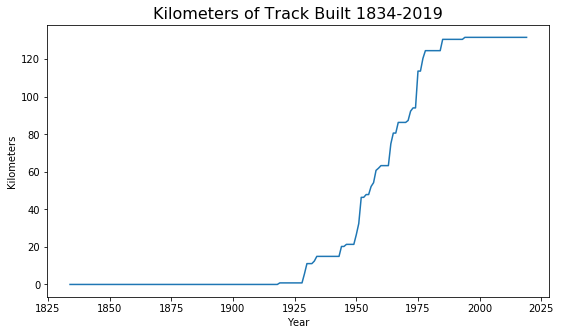

In [61]:
fig, ax = plt.subplots(1,1, figsize = (9,5))
ax.plot(st_years,st_totals,'-')
ax.set_title("Kilometers of Track Built 1834-2019", fontsize = 16)
plt.xlabel("Year")
plt.ylabel("Kilometers");

# The orginal code was developed by Megan Wright for #10-12

# 10. Accumulation of track length over the years

In [62]:
def make_frame(code):
    city_frame = pd.DataFrame(tracks)
    indexnames = city_frame[city_frame['city_id'] != code].index
    city_frame.drop(indexnames, inplace=True)
    return city_frame

In [63]:
def make_total(code):
    city_frame = pd.DataFrame(tracks)
    indexnames = city_frame[city_frame['city_id'] != code].index
    city_frame.drop(indexnames, inplace=True)
    city_years = []
    city_totals = []
    year = 1834
    kms = 0
    while year < 2020:
        for num in city_frame[city_frame['opening'] == year]['length']:
            kms  += num/1000
        year +=1
        city_totals.append(kms)
        city_years.append(year)
    return city_totals, city_years

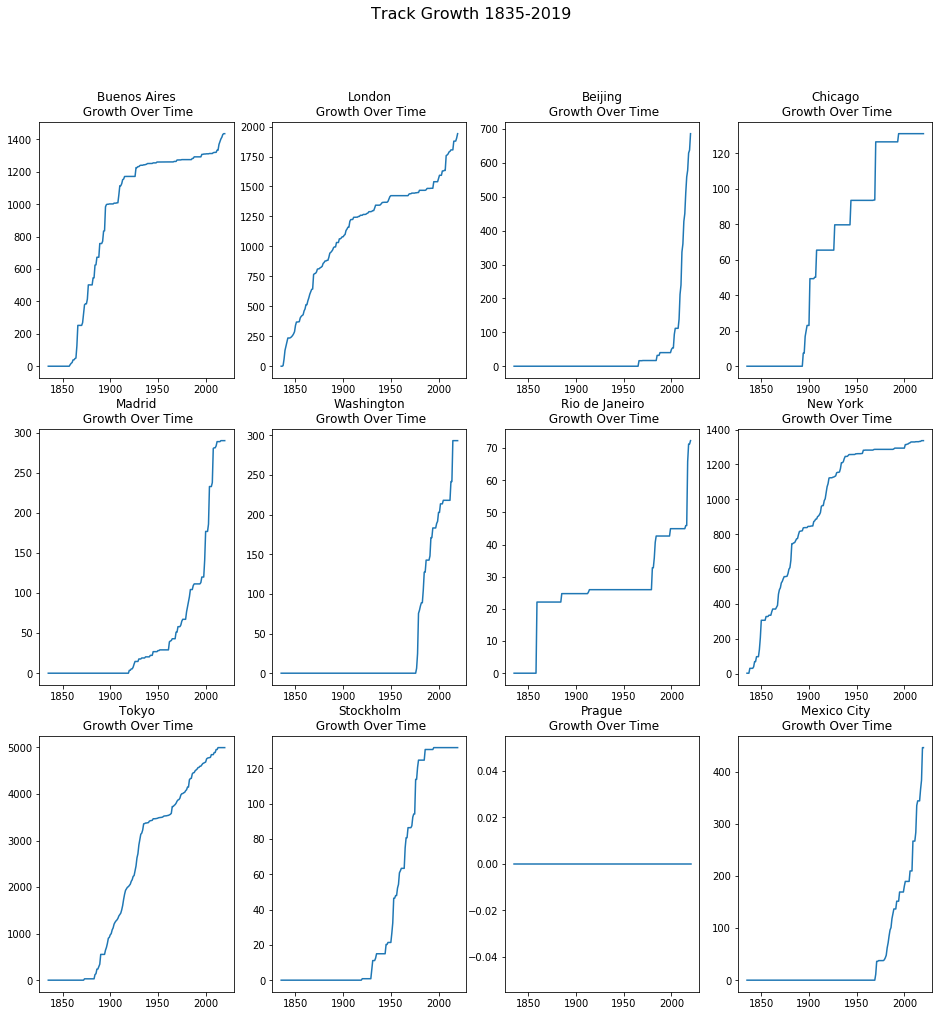

In [66]:
codes = 1,69,15,147,71,252, 102, 206, 114, 110, 99, 78
fig, axx = plt.subplots(3,4,figsize = (16,16))

for code, ax in zip(codes,axx.flatten()):
    name = cities['name'][code]
    y,x = make_total(code)
    ax.plot(x,y)
    ax.set_title(f'{name}\n Growth Over Time')
    fig.suptitle("Track Growth 1835-2019", fontsize = 16)
fig.savefig('trackgrowth.png',dpi=300)

# 11. Station locations in the selected cities

In [67]:
def parse_point(coords):
    """
    :param coords: a string in the from "POINT(x,y)"
    :return: [x,y] as floats
    """
    start = coords.find('(')
    end = coords.find(')')
    substring = coords[start+1:end]
    point = substring.split(' ')
    return float(point[0]), float(point[1])

In [68]:
stations = pd.read_csv('stations.csv', index_col = 'id')

In [70]:
parse_point(stations['geometry'][5])

(-58.4060287910671, -34.6089479261672)

In [71]:
locations = []
for geometry in stations[stations['city_id'] == 114]['geometry']:
        locations.append(parse_point(geometry))
locations = np.array(locations)

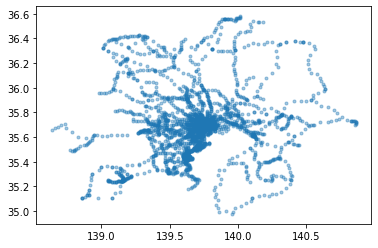

In [72]:
plt.plot(locations[:,0], locations[:,1], '.', alpha = .4)

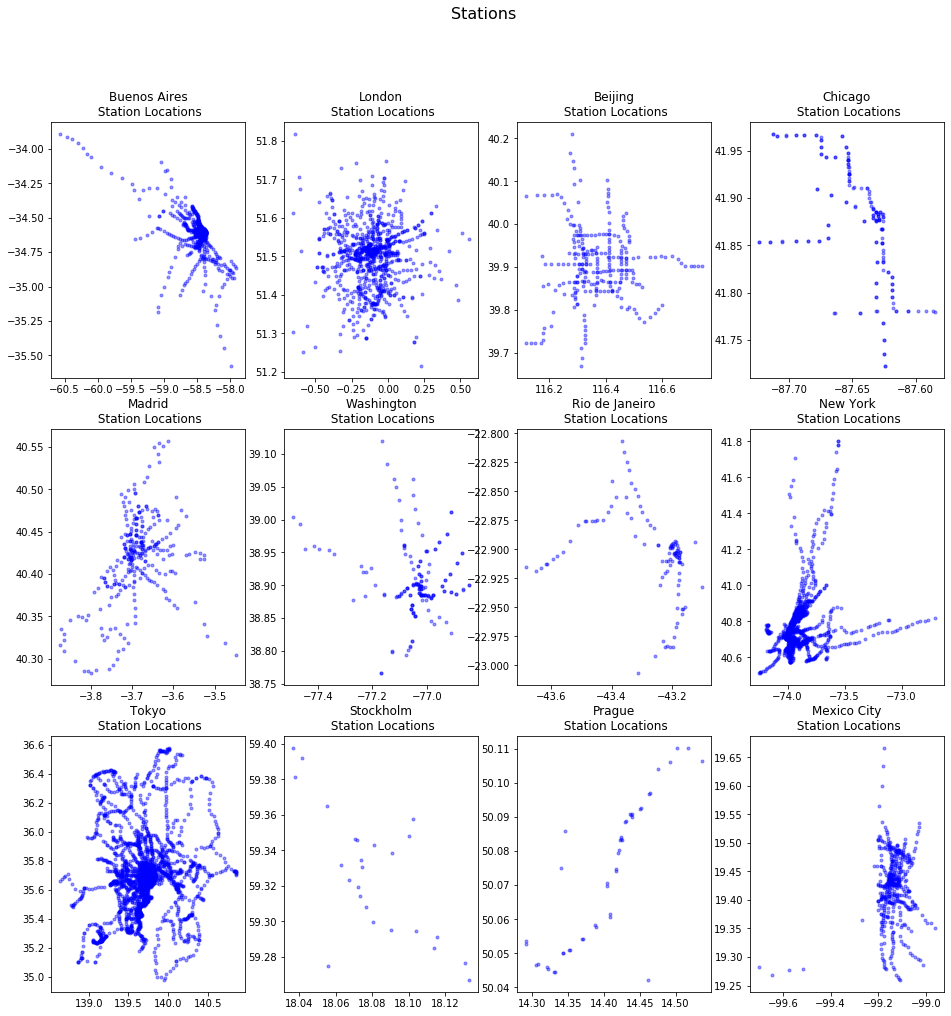

In [80]:
codes = 1,69,15,147,71,252, 102, 206, 114, 110, 99, 78
fig, axx = plt.subplots(3,4,figsize = (16,16))

for code, ax in zip(codes,axx.flatten()):
    name = cities['name'][code]
    locations = []
    for geometry in stations[stations['city_id'] == code]['geometry']:
        locations.append(parse_point(geometry))
    locations = np.array(locations)
    ax.plot(locations[:,0], locations[:,1], '.', alpha = .4, color = 'blue')
    ax.set_title(f'{name}\n Station Locations')
    fig.suptitle("Stations", fontsize = 16)
    
fig.savefig('stationloc.png',dpi=300)

# 12. Track lengths for the selected cities

<BarContainer object of 12 artists>

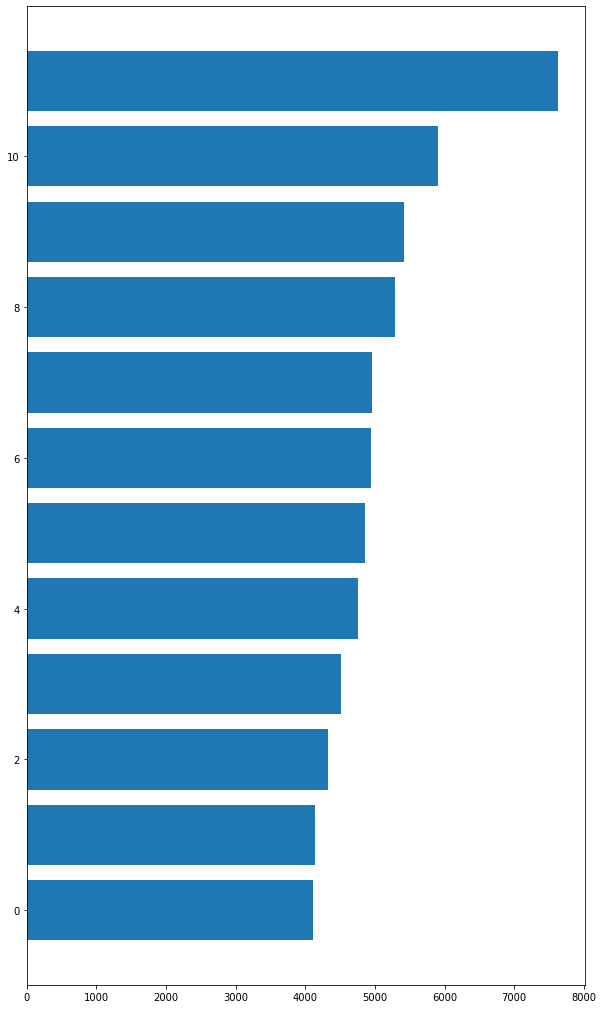

In [75]:
city_lengths = []
for track in tracks[tracks['city_id'] == 110]['length']:
    city_lengths.append(track)
city_lengths.sort()
city_lengths = city_lengths[-12:]
fig, ax = plt.subplots(1,1, figsize = (10,18))
ax.barh(np.r_[:len(city_lengths)], city_lengths)

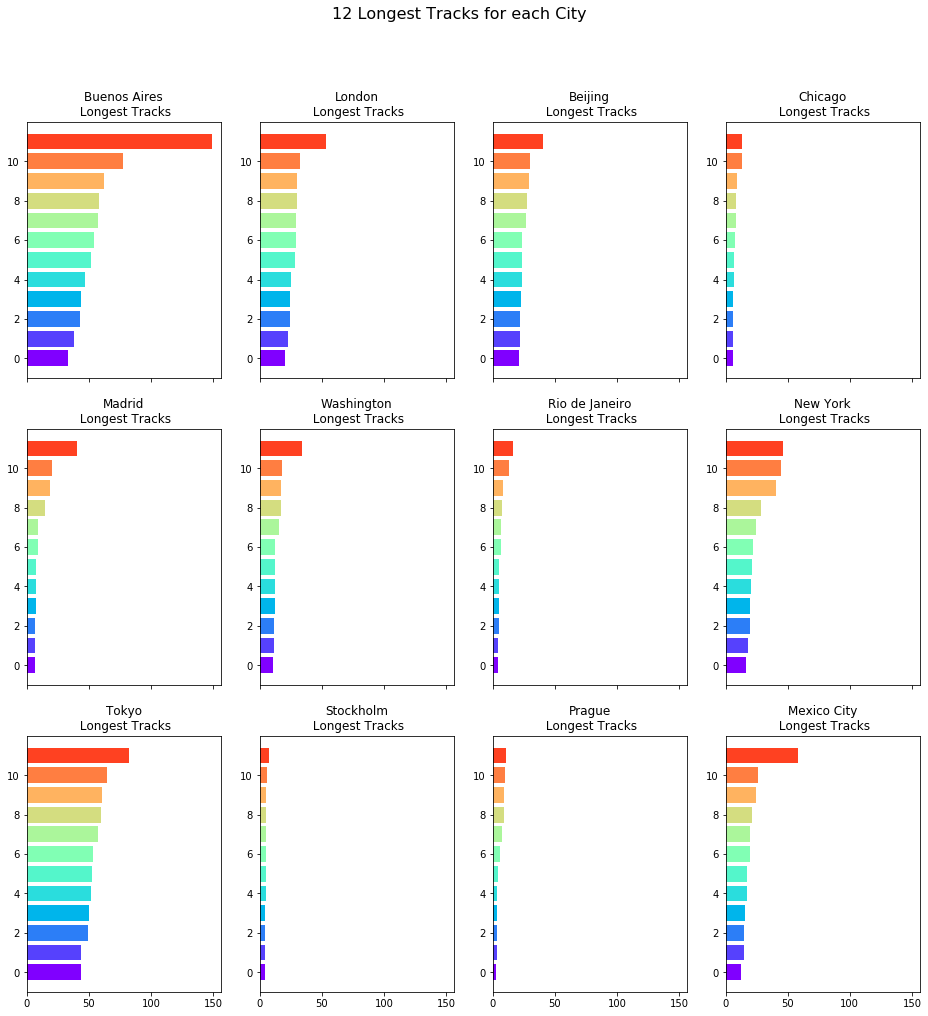

In [81]:
codes = 1,69,15,147,71,252, 102, 206, 114, 110, 99, 78
fig, axx = plt.subplots(3,4,figsize = (16,16),sharex=True)

for code, ax in zip(codes,axx.flatten()):
    n = 12
    colors = [plt.cm.rainbow(i/n) for i in range(n)]
    name = cities['name'][code]
    city_lengths = []
    for track in tracks[tracks['city_id'] == code]['length']:
        city_lengths.append(track/1000)
    city_lengths.sort()
    city_lengths = city_lengths[-12:]
    ax.barh(np.r_[:len(city_lengths)], city_lengths, color = colors)
    ax.set_title(f'{name}\n Longest Tracks')
    fig.suptitle("12 Longest Tracks for each City", fontsize = 16)

fig.savefig('longesttracks.png',dpi=300)